In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Olympiako'
raceDate = '19-05-2024'
surface = 'Gravel'
competition = 'Greek Championship'

link = 'https://www.ewrc-results.com/results/88891-olympiako-rally-2024/?s='
startat, no_ss=461256, int(6)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

C:\Users\ilias\AppData\Local\Temp\ipykernel_26892\3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_26892\3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [53]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:2]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Papadimitriou,C1,10:28.66,-,71.6,1,Olympiako,19-05-2024,Gravel,Greek Championship,1
1,2,#9,Amoutzas G. -,C2,10:38.13,+9.47 + 9.47,70.5 0.76,1,Olympiako,19-05-2024,Gravel,Greek Championship,2
2,3,#1,Tsolakidis Soc,C1,10:41.45,+12.79 + 3.32,70.2 1.02,1,Olympiako,19-05-2024,Gravel,Greek Championship,3
3,4,#5,Karanikolas E.,C2,10:43.02,+14.36 + 1.57,70.0 1.15,1,Olympiako,19-05-2024,Gravel,Greek Championship,4
4,5,#6,Panteli Petros,C2,10:45.79,+17.13 + 2.77,69.7 1.37,1,Olympiako,19-05-2024,Gravel,Greek Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,#32,Mourikis A. -,C3,14:18.98,+3:18.89 + 14.93,59.7 14.0,6,Olympiako,19-05-2024,Gravel,Greek Championship,29
29,30,#51,Dimakopoulos K,C4,14:20.94,+3:20.85 + 1.96,59.5 14.1,6,Olympiako,19-05-2024,Gravel,Greek Championship,30
30,31,#49,Katevas D. -,C6,14:49.88,+3:49.79 + 28.94,57.6 16.1,6,Olympiako,19-05-2024,Gravel,Greek Championship,31
31,32,#47,Tzilavis Savva,2,15:12.86,+4:12.77 + 22.98,56.2 17.8,6,Olympiako,19-05-2024,Gravel,Greek Championship,32


In [46]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")

In [47]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66
1,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13
2,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45
3,Karanikolas E.,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,4,643.02
4,Panteli Petros,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,5,645.79
...,...,...,...,...,...,...,...,...,...
28,Mourikis A. -,C3,6,Olympiako,19-05-2024,Gravel,Greek Championship,29,858.98
29,Dimakopoulos K,C4,6,Olympiako,19-05-2024,Gravel,Greek Championship,30,860.94
30,Katevas D. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,31,889.88
31,Tzilavis Savva,2,6,Olympiako,19-05-2024,Gravel,Greek Championship,32,912.86


In [48]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Gr/Cl             
Olympiako 1  2           777.35
             4           687.95
             C1          628.66
             C2          638.13
             C3          728.28
             C4          690.64
             C5          676.97
             C6          733.06
          2  2           934.01
             4           803.11
             C1          707.82
             C2          722.31
             C3          816.80
             C4          784.63
             C5          760.90
             C6          831.63
          3  2           843.32
             4           759.15
             C1          694.70
             C2          680.43
             C3          783.92
             C4          728.69
             C5          705.93
             C6          774.53
          4  2           796.16
             C1          632.31
             C2          631.78
             C3          721.93
             C4          694.29
             C5          664.64
             C6          734.68
          5  2           939.74
             C1          712.45
             C2          713.89
             C3          853.11
             C4          796.36
             C5          768.28
             C6          847.46
          6  2           843.61
             C1          684.96
             C2          660.09
             C3          780.80
             C4          727.37
             C5          709.14
             C6          789.43

In [49]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,Rendina Max -,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,7,649.50,628.66,628.66,20.84,20.84,3.314987,01
3,Philippedes Yo,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,8,651.94,628.66,628.66,23.28,23.28,3.703115,01
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Pateas A. - P,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,24,810.40,789.43,660.09,150.31,20.97,2.656347,06
244,Sotiropoulos N,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,26,840.40,789.43,660.09,180.31,50.97,6.456557,06
245,Katevas D. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,31,889.88,789.43,660.09,229.79,100.45,12.724371,06
246,Vassilopoulos,2,6,Olympiako,19-05-2024,Gravel,Greek Championship,27,843.61,843.61,660.09,183.52,0.00,0.000000,06


In [50]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [51]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Amoutzas G. -,0.00,6.05,2.06,0.00,10.20,5.54
Anastassopoulo,36.23,47.08,92.69,32.79,33.40,45.59
Angelopoulos A,19.30,35.19,21.83,18.50,3.93,0.00
Athanassopoulo,8.48,21.09,47.48,15.98,NaN,NaN
Bris Panagioti,31.71,55.26,31.67,18.24,26.73,28.54
Chatzigakis Gi,7.78,22.17,0.00,0.00,25.00,44.81
Chatzimarkos P,14.16,0.00,14.65,12.50,0.00,NaN
Davaris Nikos,82.57,122.40,89.77,91.60,105.93,121.16
Delaportas Gio,45.55,61.01,101.19,53.55,67.09,53.42


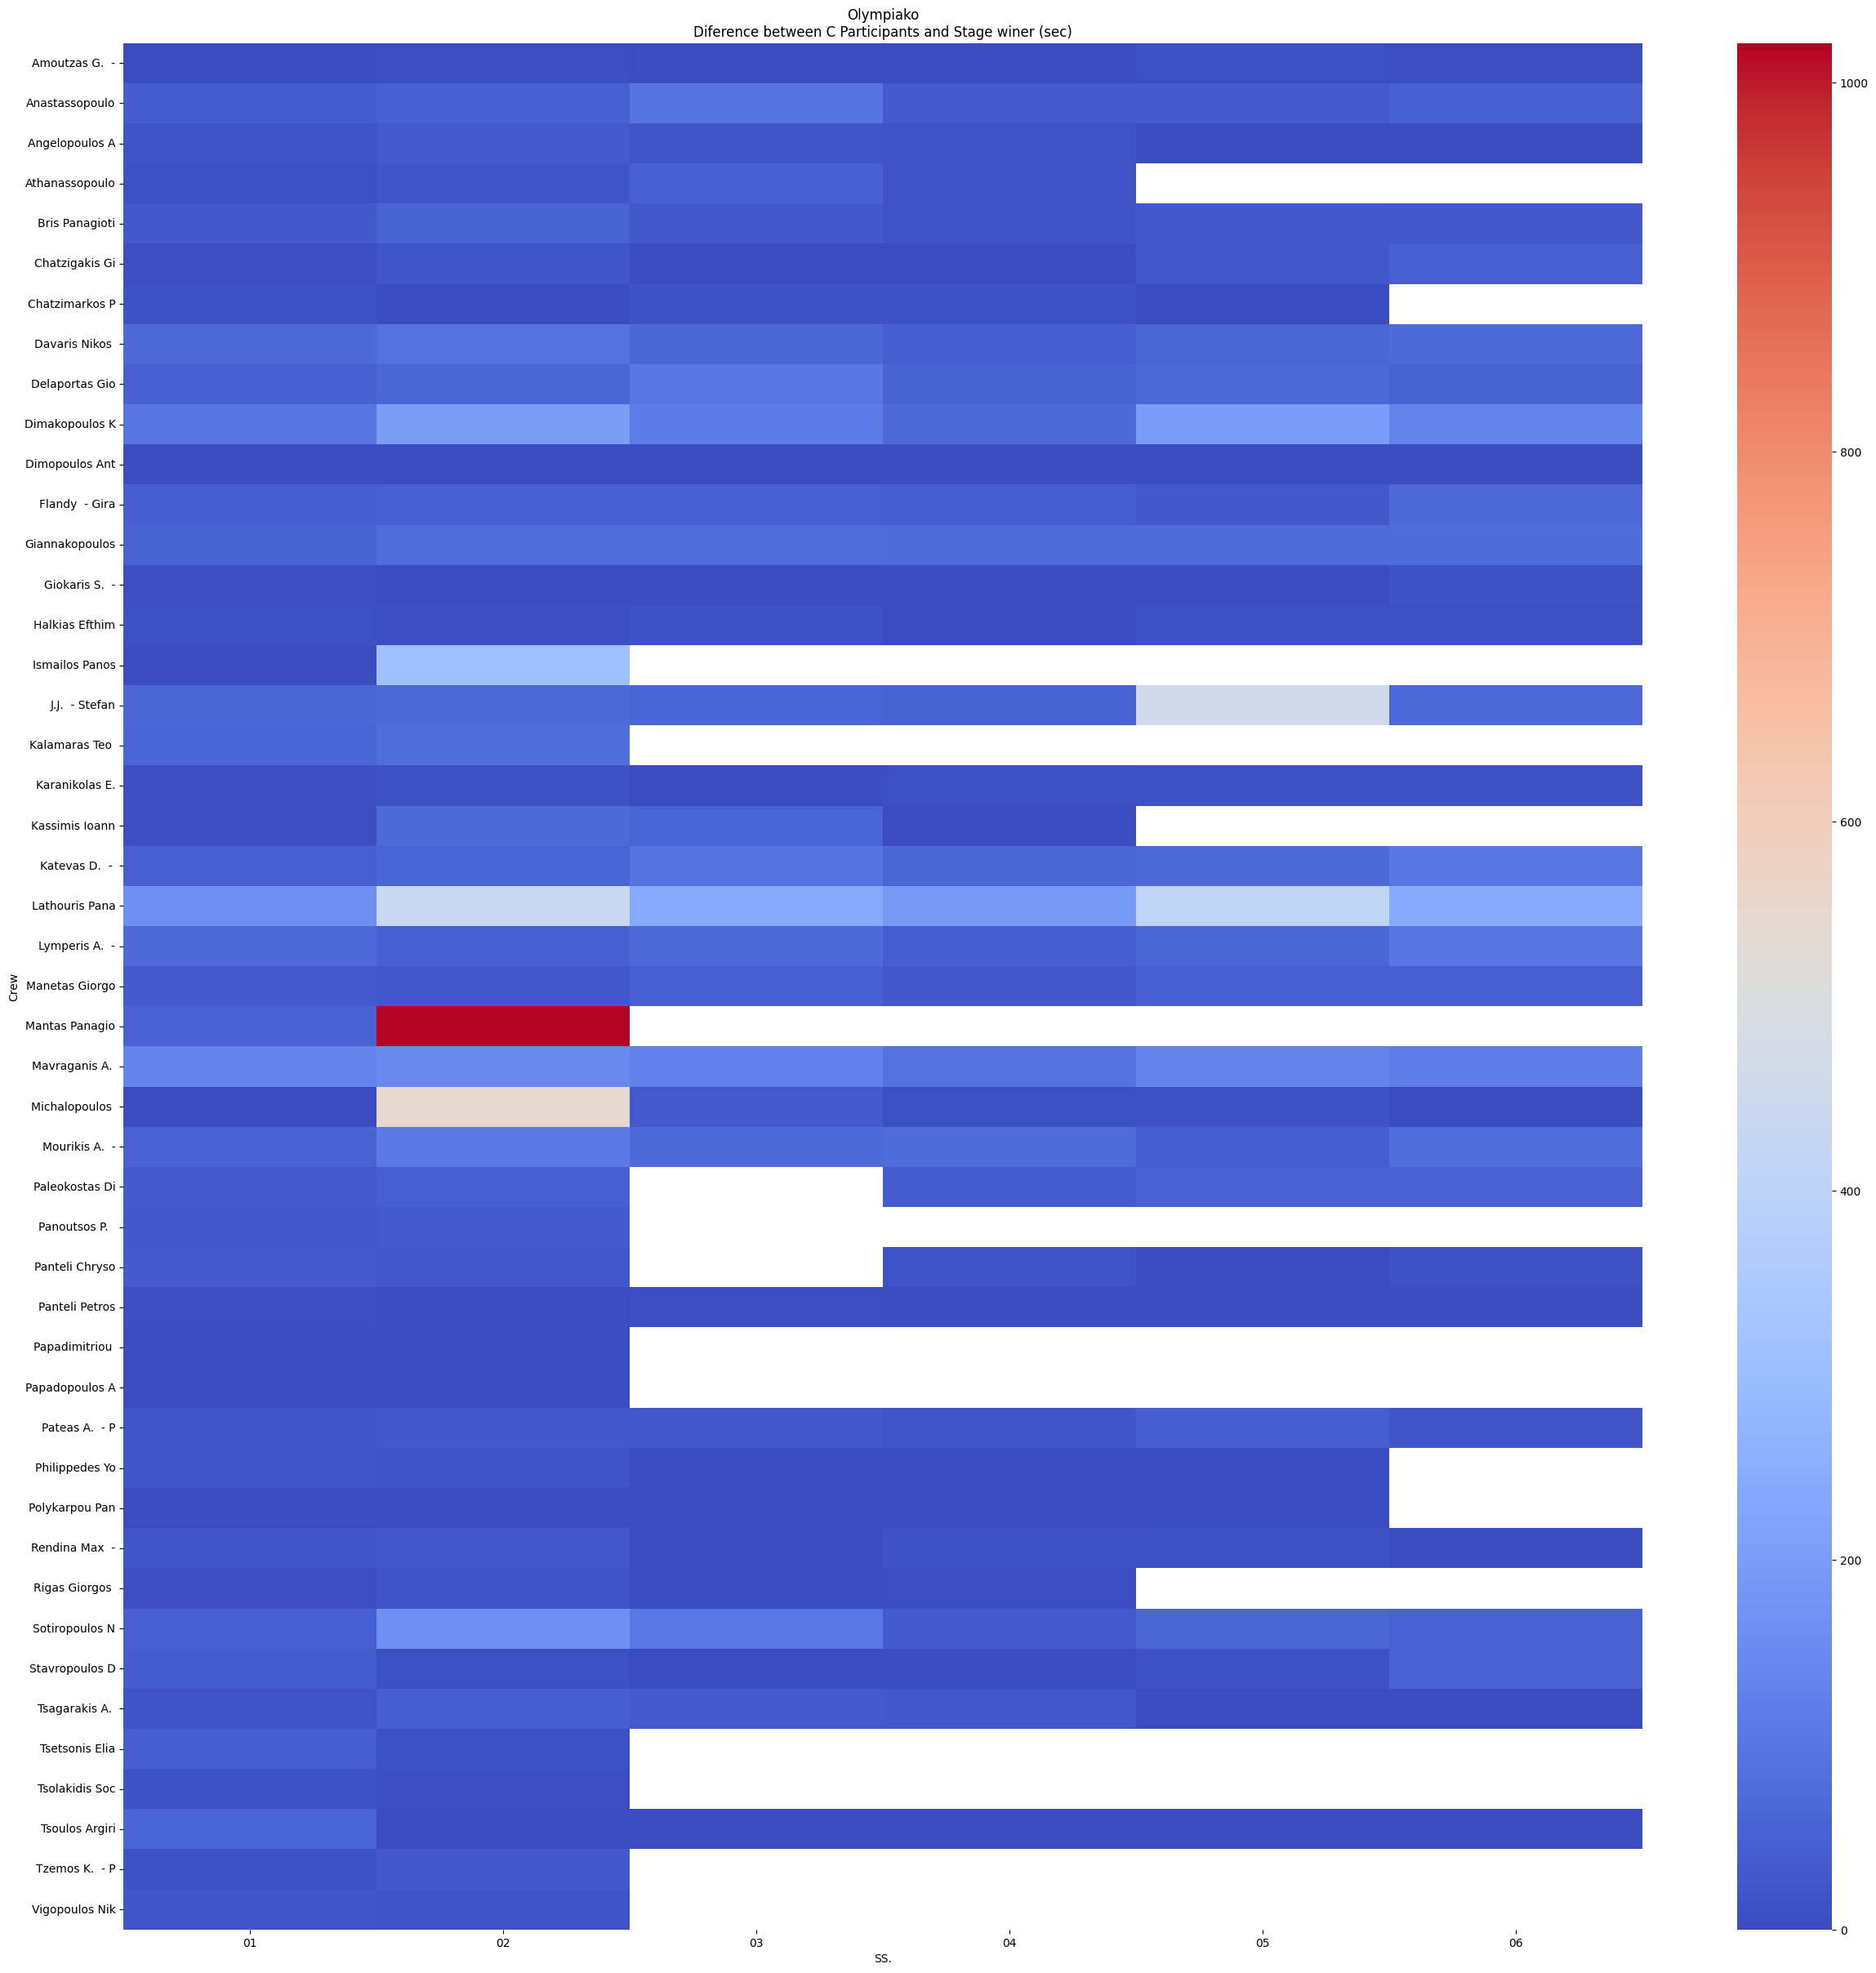

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

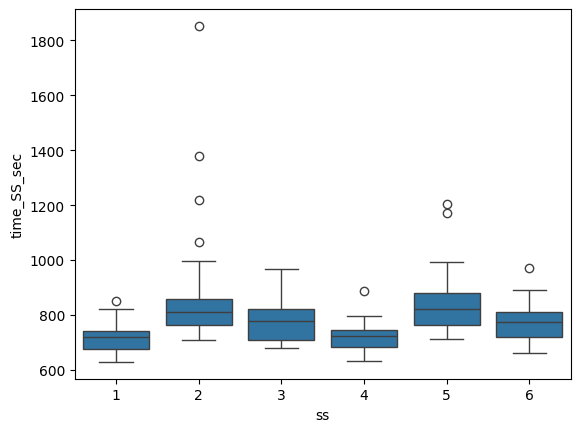

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

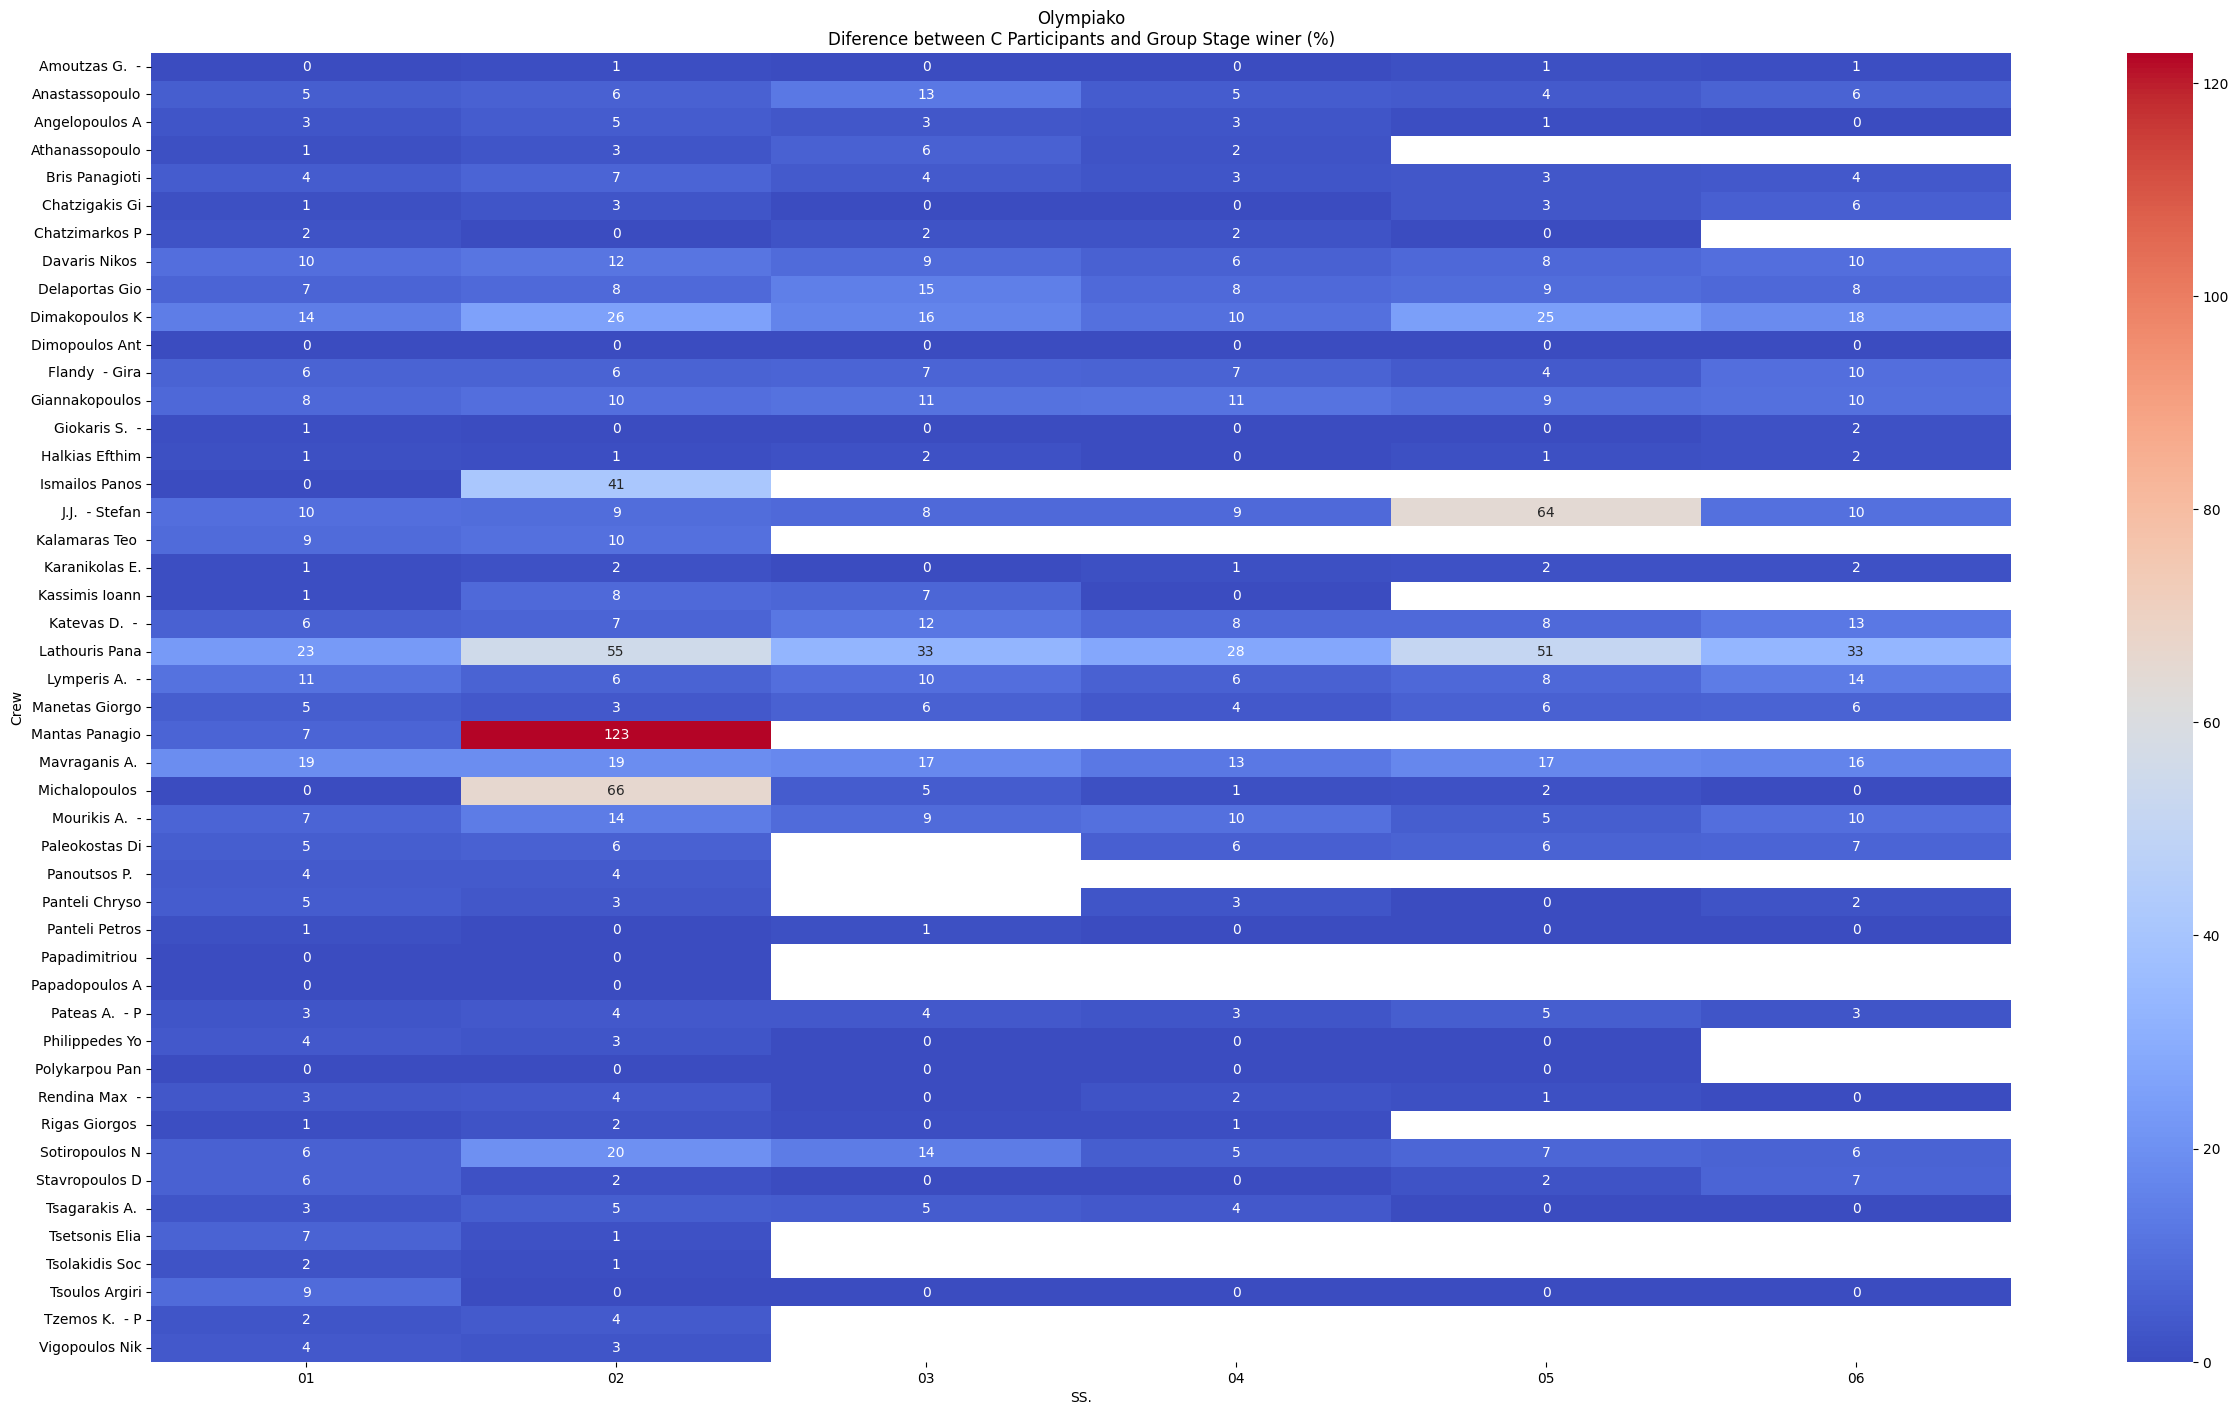

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [15]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,Rendina Max -,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,7,649.50,628.66,628.66,20.84,20.84,3.314987,01
3,Philippedes Yo,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,8,651.94,628.66,628.66,23.28,23.28,3.703115,01
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Michalopoulos,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,20,789.43,789.43,660.09,129.34,0.00,0.000000,06
242,Giokaris S. -,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,21,802.01,789.43,660.09,141.92,12.58,1.593555,06
243,Pateas A. - P,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,24,810.40,789.43,660.09,150.31,20.97,2.656347,06
244,Sotiropoulos N,C6,6,Olympiako,19-05-2024,Gravel,Greek Championship,26,840.40,789.43,660.09,180.31,50.97,6.456557,06


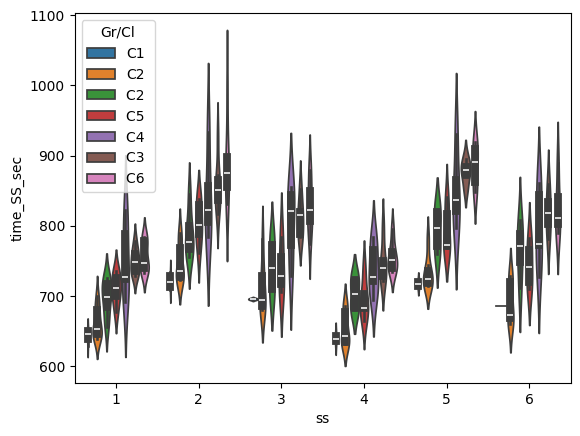

In [16]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

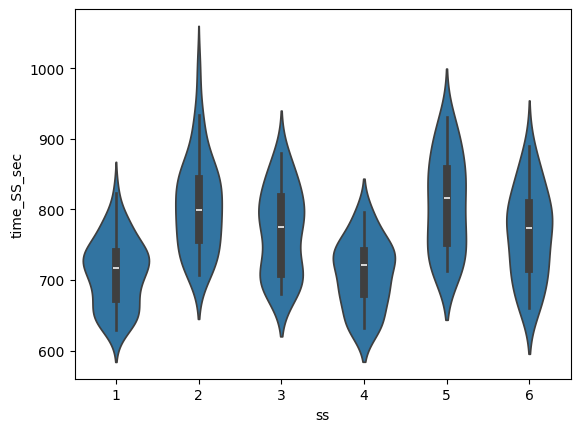

In [17]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

In [18]:
Thiva = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1) & (ss_times_FIXED["ss"] < 5)]
Elikonas = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

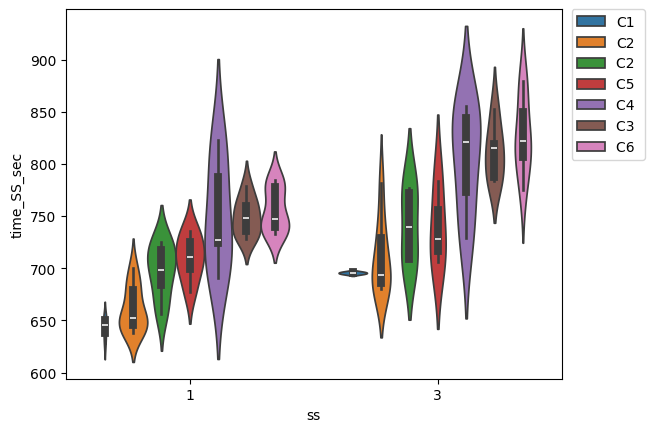

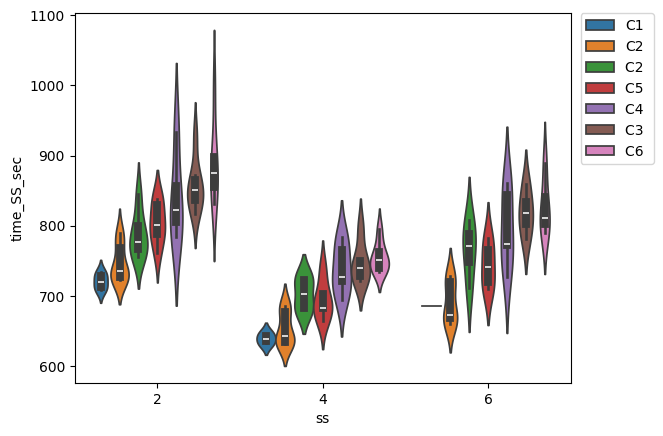

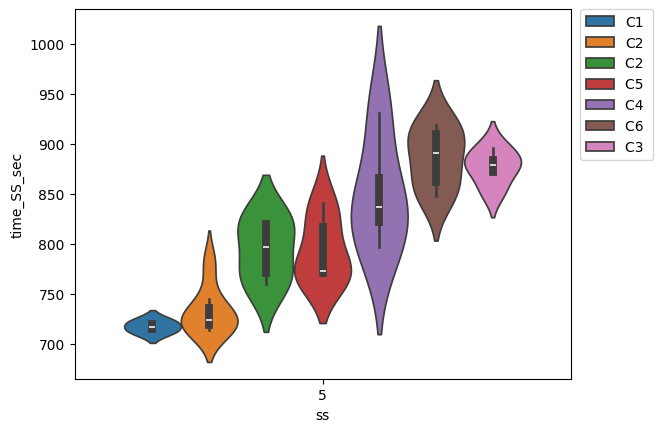

In [19]:
fig.set_size_inches(30,30)
sns.violinplot( y=Thiva["time_SS_sec"], x=Thiva["ss"], hue = Thiva["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,30)
sns.violinplot( y=Elikonas["time_SS_sec"], x=Elikonas["ss"], hue = Elikonas["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
fig.set_size_inches(30,30)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')

In [20]:
Group = 'C1 - C2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [21]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

SS.,01,02,03,04,05,06
Crew,,,,,,
Amoutzas G. -,0.00,6.05,2.06,0.00,10.20,5.54
Chatzimarkos P,14.16,0.00,14.65,12.50,0.00,NaN
Davaris Nikos,64.80,88.71,62.44,41.36,60.26,70.50
Delaportas Gio,45.55,61.01,101.19,53.55,67.09,53.42
Flandy - Gira,41.11,45.91,46.18,42.38,30.65,65.54
Halkias Efthim,8.76,4.02,12.23,0.96,9.48,11.44
Ismailos Panos,0.00,310.20,NaN,NaN,NaN,NaN
J.J. - Stefan,62.39,67.77,55.91,53.95,459.21,67.56
Karanikolas E.,4.89,12.80,0.00,8.70,12.95,12.06


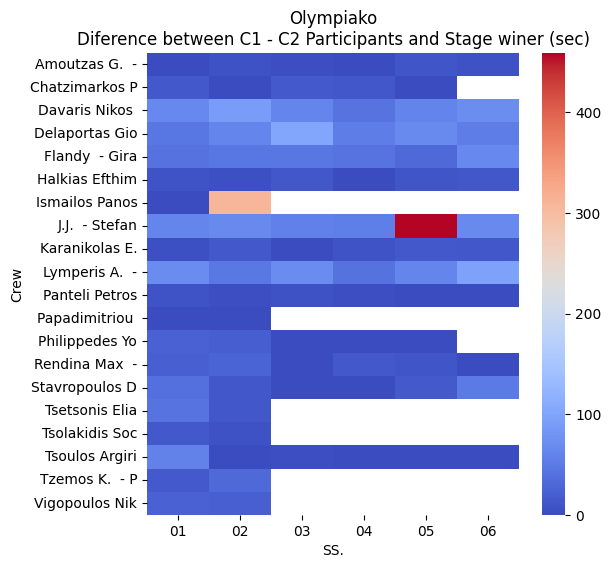

In [22]:
fig,ax = plt.subplots()
fig.set_size_inches(6,6)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [27]:
aa=ss_times_F[ss_times_F['ss']==1]
aa

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Papadimitriou,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,1,628.66,628.66,628.66,0.00,0.00,0.000000,01
1,Tsolakidis Soc,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,3,641.45,628.66,628.66,12.79,12.79,2.034486,01
2,Rendina Max -,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,7,649.50,628.66,628.66,20.84,20.84,3.314987,01
3,Philippedes Yo,C1,1,Olympiako,19-05-2024,Gravel,Greek Championship,8,651.94,628.66,628.66,23.28,23.28,3.703115,01
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
5,Karanikolas E.,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,4,643.02,638.13,628.66,14.36,4.89,0.766302,01
6,Panteli Petros,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,5,645.79,638.13,628.66,17.13,7.66,1.200382,01
7,Halkias Efthim,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,6,646.89,638.13,628.66,18.23,8.76,1.372761,01
8,Chatzimarkos P,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,9,652.29,638.13,628.66,23.63,14.16,2.218984,01
9,Vigopoulos Nik,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,11,661.25,638.13,628.66,32.59,23.12,3.623086,01


In [29]:
aa['Gr/Cl'].value_counts()

Gr/Cl
C2     9
C6     8
C2     7
C3     7
C5     6
C4     6
C1     4
2      2
4      1
Name: count, dtype: int64

In [43]:
ss = aa[aa['Gr/Cl'].str.contains('C2')]
#aanew = aa.drop(ss)
#aanew
ss

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
4,Amoutzas G. -,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,2,638.13,638.13,628.66,9.47,0.00,0.000000,01
5,Karanikolas E.,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,4,643.02,638.13,628.66,14.36,4.89,0.766302,01
6,Panteli Petros,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,5,645.79,638.13,628.66,17.13,7.66,1.200382,01
7,Halkias Efthim,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,6,646.89,638.13,628.66,18.23,8.76,1.372761,01
8,Chatzimarkos P,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,9,652.29,638.13,628.66,23.63,14.16,2.218984,01
9,Vigopoulos Nik,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,11,661.25,638.13,628.66,32.59,23.12,3.623086,01
10,Flandy - Gira,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,14,679.24,638.13,628.66,50.58,41.11,6.442261,01
11,Delaportas Gio,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,15,683.68,638.13,628.66,55.02,45.55,7.138044,01
12,J.J. - Stefan,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,21,700.52,638.13,628.66,71.86,62.39,9.777005,01
13,Ismailos Panos,C2,1,Olympiako,19-05-2024,Gravel,Greek Championship,10,655.90,655.90,628.66,27.24,0.00,0.000000,01


In [44]:
ss['Gr/Cl'].value_counts()

Gr/Cl
C2     9
C2     7
Name: count, dtype: int64